In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

In [4]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
import neural_network as nn

In [8]:
xor = pd.read_csv('../data/xor.csv')
x, y = xor[['x1', 'x2']], xor[['out']]

In [238]:
xor

,x1,x2,out
0,-0.5,-0.5,-0.5
1,0.5,-0.5,0.5
2,-0.5,0.5,0.5
3,0.5,0.5,-0.5


## Task 1

1. The instructions specified that for this exercise, convergence is reached when MSE < 0.05, but the class I implemented wasn't (and likely shouldn't be) designed to terminate when some absolute objective function value is reached, so I'll just specify tolerance for the difference between consecutive losses.

In [247]:
max_epochs = 500000

#### 2 hidden-layer nodes

In [248]:
nn2 = nn.NeuralNetwork(learning_rate=0.1, momentum=0, tol=1e-10, max_epochs=max_epochs)
nn2.add_hidden_layer(2, 'tanh')
nn2.add_output_layer(1, 'tanh')

In [249]:
nn2.fit(x, y, store_losses=True)

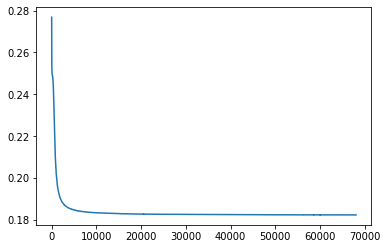

In [250]:
plt.plot(range(len(nn2.losses)), nn2.losses)

In [251]:
nn2.losses[-5:-1]

[0.18226363972068838,
 0.1822637822099381,
 0.18226355961786356,
 0.18226370889898863]

#### 4 hidden-layer nodes

In [253]:
nn4 = nn.NeuralNetwork(learning_rate=0.1, momentum=0, tol=1e-10, max_epochs=max_epochs)
nn4.add_hidden_layer(4, 'tanh')
nn4.add_output_layer(1, 'tanh')

In [254]:
nn4.fit(x, y, store_losses=True)

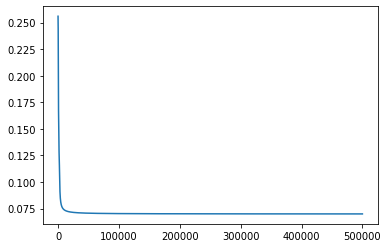

In [255]:
plt.plot(range(len(nn4.losses)), nn4.losses)

In [256]:
nn4.losses[-5:-1]

[0.06991680353270563,
 0.06991680337634379,
 0.06991680321998278,
 0.0699168030636221]

#### 6 hidden-layer nodes

In [258]:
nn6 = nn.NeuralNetwork(learning_rate=0.1, momentum=0, tol=1e-10, max_epochs=max_epochs)
nn6.add_hidden_layer(6, 'tanh')
nn6.add_output_layer(1, 'tanh')

In [259]:
nn6.fit(x, y, store_losses=True)

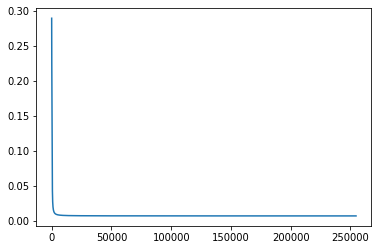

In [260]:
plt.plot(range(len(nn6.losses)), nn6.losses)

In [261]:
nn6.losses[-5:-1]

[0.007527444154874063,
 0.007527444054826676,
 0.007527443954848024,
 0.0075274438548254136]

_Remarks_: In all cases, error declines rapidly, then enters a slow, relatively marginal decrease. 

I gave up on getting nn2 to converge to a lower value, after trying various hyperparameters (do tolerance and max_epochs count as such?). Unsurprisingly, the networks with more nodes in the hidden layer converged to smaller error values, i.e. approximate the target more closely. The more hidden layer nodes, the closer the approximation (though I expect diminishing returns to set in beyond 10 or so in this case).

#### Just for functionality testing: initialise all at once
Not part of the assignment

In [282]:
nn6 = nn.NeuralNetwork(hidden_layer_dims=[6], hidden_layer_activations=['tanh'], output_activation='tanh',
                       learning_rate=0.1, momentum=0, tol=1e-10, max_epochs=max_epochs)

In [283]:
nn6.fit(x, y, store_losses=True)

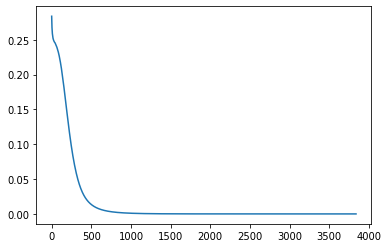

In [284]:
plt.plot(range(len(nn6.losses)), nn6.losses)

In [285]:
nn6.losses[-5:-1]

[2.8117152389373818e-08,
 2.8017661631599224e-08,
 2.7918523184907124e-08,
 2.7819735360801187e-08]

_Remark_: I've done a few training runs of this as well as task 1, and this seems to persistently converge to lower error values, even though the difference should be purely procedural... I should check my code for bugs that might account for this behaviour.

## Task 2

Repeat task 1 with momentum parameter $\gamma = 0.9$ (implemented as the default, thus not specified below).

#### 2 hidden-layer nodes

In [266]:
nn2 = nn.NeuralNetwork(learning_rate=0.1, tol=1e-10, max_epochs=max_epochs)
nn2.add_hidden_layer(2, 'tanh')
nn2.add_output_layer(1, 'tanh')

In [267]:
nn2.fit(x, y, store_losses=True)

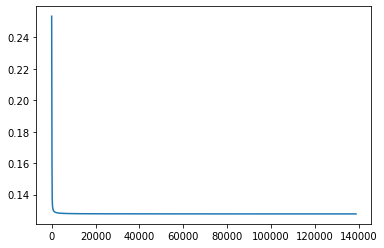

In [268]:
plt.plot(range(len(nn2.losses)), nn2.losses)

In [269]:
nn2.losses[-5:-1]

[0.12771416989606973,
 0.1277141697955242,
 0.12771416969538293,
 0.12771416959518364]

#### 4 hidden-layer nodes

In [278]:
nn4 = nn.NeuralNetwork(learning_rate=0.1, tol=1e-10, max_epochs=max_epochs)
nn4.add_hidden_layer(4, 'tanh')
nn4.add_output_layer(1, 'tanh')

In [279]:
nn4.fit(x, y, store_losses=True)

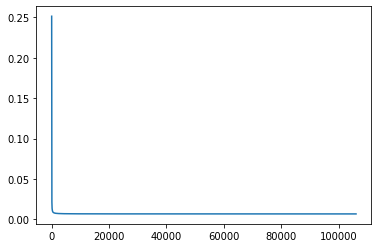

In [280]:
plt.plot(range(len(nn4.losses)), nn4.losses)

In [281]:
nn4.losses[-5:-1]

[0.006651613749175754,
 0.006651613625972999,
 0.006651613509831343,
 0.006651613387124911]

#### 6 hidden-layer nodes

In [274]:
nn6 = nn.NeuralNetwork(learning_rate=0.1, tol=1e-10, max_epochs=max_epochs)
nn6.add_hidden_layer(6, 'tanh')
nn6.add_output_layer(1, 'tanh')

In [275]:
nn6.fit(x, y, store_losses=True)

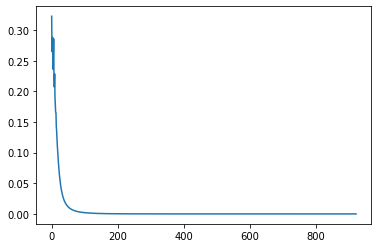

In [276]:
plt.plot(range(len(nn6.losses)), nn6.losses)

In [277]:
nn6.losses[-5:-1]

[7.2249093275630785e-09,
 7.1244460608783256e-09,
 7.026282531344272e-09,
 6.930592420051103e-09]

_Remarks_: In all cases, error converged to substantially lower values than in task 1. However, it's not clear why that would generally be the case, and more runs would be needed to at least establish if it is indeed a feature of learning this dataset with this architecture.

The shapes of the curves, on the other hand, seem very similar to those seen in task 1, with nn6 being a bit of an exception, having error increase at times; I'd guess this is due to error already decreasing smoothly without momentum, so adding that changed that behaviour to create this artefact by chance.